<a href="https://colab.research.google.com/github/restful3/ds4th_study/blob/main/source/%EA%B0%9C%EB%B0%9C%EC%9E%90%EB%A5%BC_%EC%9C%84%ED%95%9C_%EC%8B%A4%EC%A0%84_%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98%ED%95%99/ch08_%EC%A7%81%EA%B5%90%ED%96%89%EB%A0%AC%EA%B3%BC_QR%EB%B6%84%ED%95%B4_wooseok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

- 이 책의 주요과제인 직교행렬 분해, QR분해, LU분해, 고윳값분해, 특이값분해 중 QR분해를 배운다.
- QR 분해(QR Decomposition)는 행렬을

    - 직교 행렬(Orthogonal Matrix)과 상삼각행렬(Upper Triangular Matrix)의 곱으로 분해하는 방법
    - 특히 역행렬, 최소제곱 모델 적합, 교윳값분해 등 응용 분야에 사용되는 핵심 기법
<br>
- QR분해를 배우려면 새로운 특수 행렬 유형인 직교행렬(Orthogonal matrics)을 알아야 함

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib_inline.backend_inline
import warnings
warnings.filterwarnings('ignore')
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# 직교행렬 (Orthogonal matrices)
- 여러 분해를 위해 필수적인 특수 행렬로 문자 Q로 나타냄. 두가지 성질을 지니고 있음
  - 행렬의 모든 열은 서로 직교함
  - 각 열의 노름은 정확히 1임
    > 자신과의 내적은 1이지만, 다른열과의 내적은 0

- $Q^TQ=I$
  - 직교행렬의 역행렬은 그 행렬의 전치임
    >  따라서 일반적 역행렬보다 빠르고 정확


- $\frac{1}{\sqrt 2}
  \ {\begin{vmatrix}
    1 & -1 \\
    1 & 1 \\
  \end{vmatrix}} , $
  $\frac{1}{3}
  \ {\begin{vmatrix}
    1 & 2 & 2 \\
    2 & 1 & -2\\
    -2 & 2 & -1\\
  \end{vmatrix}}$

- 위의 행렬에서 각 열의 노름이 1이고 다른열과 직교하는지 생각해보고 실행해보자

## 각 열의 노름 계산

In [ ]:
# specify the matrices
Q1 = np.array([ [1,-1],[1,1] ]) / np.sqrt(2)
Q2 = np.array([ [1,2,2],[2,1,-2],[-2, 2,-1] ]) / 3

In [ ]:
for col in range(Q1.shape[1]):
    print(f"Q1의 {col+1}열의 노름: {np.linalg.norm(Q1[:, col]):.1f}")

Q1의 1열의 노름: 1.0
Q1의 2열의 노름: 1.0


In [ ]:
for col in range(Q2.shape[1]):
    print(f"Q2의 {col+1}열의 노름: {np.linalg.norm(Q2[:, col]):.1f}")

Q2의 1열의 노름: 1.0
Q2의 2열의 노름: 1.0
Q2의 3열의 노름: 1.0


## 각 열이 다른 열과 직교하는지 확인
- 두 벡터가 직교하면 내적 값이 0. 따라서 내적 값이 0에 가까우면 두 벡터는 직교한다고 볼 수 있음

In [ ]:
# Q1의 첫 번째 열과 두 번째 열의 내적 계산
dot_product_Q1 = np.dot(Q1[:, 0], Q1[:, 1])
print(f"Q1의 첫 번째 열과 두 번째 열의 내적: {dot_product_Q1}")

# 내적이 0이면 두 벡터는 직교
if np.isclose(dot_product_Q1, 0):
    print("Q1의 첫 번째 열과 두 번째 열은 직교한다")
else:
    print("Q1의 첫 번째 열과 두 번째 열은 직교하지 않는다.")

Q1의 첫 번째 열과 두 번째 열의 내적: 0.0
Q1의 첫 번째 열과 두 번째 열은 직교한다


In [ ]:
# Q2의 첫 번째 열과 두 번째 열의 내적 계산
dot_product_Q2_1_2 = np.dot(Q2[:, 0], Q2[:, 1])
print(f"Q2의 첫 번째 열과 두 번째 열의 내적: {dot_product_Q2_1_2}")

# Q2의 첫 번째 열과 세 번째 열의 내적 계산
dot_product_Q2_1_3 = np.dot(Q2[:, 0], Q2[:, 2])
print(f"Q2의 첫 번째 열과 세 번째 열의 내적: {dot_product_Q2_1_3}")

# Q2의 두 번째 열과 세 번째 열의 내적 계산
dot_product_Q2_2_3 = np.dot(Q2[:, 1], Q2[:, 2])
print(f"Q2의 두 번째 열과 세 번째 열의 내적: {dot_product_Q2_2_3}")

Q2의 첫 번째 열과 두 번째 열의 내적: 0.0
Q2의 첫 번째 열과 세 번째 열의 내적: 0.0
Q2의 두 번째 열과 세 번째 열의 내적: 0.0


```
각 열의 노름이 1이고, 각열이 다른열과 직교하므로, Q는 직교행렬이라 할 수 있다.
직교행렬의 전치곱을 구하면...
```

In [ ]:
# should be I (to within rounding error...)
print( np.round(Q1.T @ Q1,8) ), print(' ')

print( np.round(Q2.T @ Q2,8) )

[[1. 0.]
 [0. 1.]]
 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


- 두 출력 모두 단위행렬임

직교행렬(orthogonal matrix)은 선형대수에서 매우 중요한 개념으로, 다시 특징과 성질을 정리하자 !!

1. 정의: 행렬 Q가 직교행렬이려면 Q의 전치행렬($Q^{T}$)과 역행렬($Q^{-1}$)이 같아야 합니다. 즉, $Q^{T} = Q^{-1}$이어야 함

2. 직교행렬의 모든 열벡터와 행벡터는 서로 직교 : 즉, 서로 다른 두 열벡터 또는 행벡터의 내적은 0

3. 직교행렬의 모든 열벡터와 행벡터의 노름(norm)은 1 (단위벡터)

4. 직교행렬의 행렬식의 값은 1 또는 -1. 행렬식의 값이 1이면 회전변환을, -1이면 회전변환과 반전변환을 동시에 나타냄.

6. 직교행렬에 의한 선형변환은 벡터의 길이와 벡터 사이의 각도를 보존. 이는 직교행렬이 회전과 반전 변환만을 나타내기 때문

7. 행렬곱: 두 직교행렬의 곱은 또 다른 직교행렬

8. 역변환: 직교행렬의 역변환은 원래의 벡터로 되돌리는 역할

직교행렬은 선형대수, 기하학, 물리학, 신호처리, 데이터 분석 등 다양한 분야에서 활용
- 특히, 회전변환, 반사변환, 좌표계 변환 등을 표현하는 데 유용. 또한, 직교행렬은 QR 분해, 특이값 분해(SVD) 등의 중요한 행렬 분해 방법에서 핵심적인 역할을 합니다.

# 그람-슈미트 과정
- QR분해는 기본적으로 그람-슈미트 과정에서 발전한 형태
  - 그람-슈미트 과정은 비직교 행렬을 직교 행렬로 변환하는 방법
  - 그람-슈미트 과정의 핵심은 주어진 벡터에서 이전에 구한 직교 벡터들의 성분을 제거하는 것

- 그람-슈미트 과정 단계 :

1. 입력 벡터 집합 V = {v1, v2, ..., vn}를 준비
2. 첫 번째 직교 벡터 u1을 v1과 같게 함
> u1 = v1
3. 두 번째 직교 벡터 u2를 구하기 위해, v2에서 u1에 대한 성분을 제거
> u2 = v2 - proj_u1(v2) ※ proj_u1(v2)는 v2를 u1에 정사영한 벡터
4. 세 번째 직교 벡터 u3를 구하기 위해, v3에서 u1과 u2에 대한 성분을 제거
> u3 = v3 - proj_u1(v3) - proj_u2(v3)
5. 이 과정을 n번째 벡터까지 반복하여 {u1, u2, ..., un}의 직교 벡터 집합을 구함
6. 마지막으로 각 ui 벡터를 정규화(normalize)하여 단위 벡터로 변환
> 이를 통해 새로운 직교 벡터를 얻을 수 있음


이 과정을 행렬 표기법으로 나타내면 :

Q = [u1/||u1||, u2/||u2||, ..., un/||un||]$


Q는 구해진 직교 벡터들로 이루어진 직교행렬입니다

그람-슈미트 과정은 QR 분해, 최소제곱 문제, 데이터 압축 등 다양한 분야에서 활용되고 있습니다.
특히, QR 분해에서 Q 행렬을 구하는 데 사용

# QR분해
np.linalg.qr(A)를 통해 정방 행렬의 QR 분해를 쉽게 계산 가능

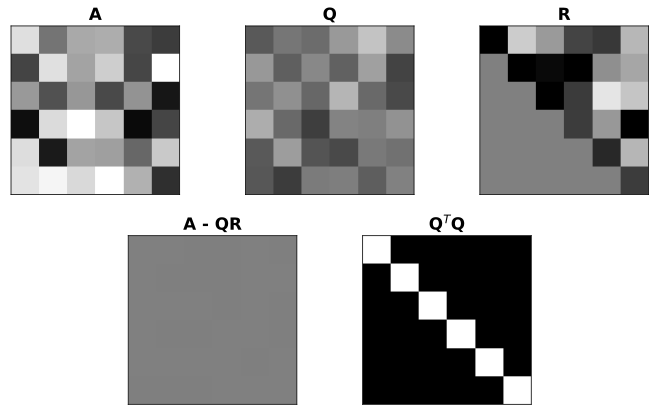

In [ ]:
# 임의의 행렬 a 생성
A = np.random.randn(6,6)

# Q, R 분해 진행
Q,R = np.linalg.qr(A)

fig = plt.figure(figsize=(10,6))
axs = [0]*5
c = 1.5 # color limits

gs1 = gridspec.GridSpec(2,6)
axs[0] = plt.subplot(gs1[0,:2])
axs[0].imshow(A, vmin=-c, vmax=c, cmap='gray') # A행렬 확인
axs[0].set_title('A',fontweight='bold')

axs[1] = plt.subplot(gs1[0,2:4])
axs[1].imshow(Q, vmin=-c,vmax=c,cmap='gray') # Q행렬 확인
axs[1].set_title('Q',fontweight='bold')

axs[2] = plt.subplot(gs1[0,4:6])
axs[2].imshow(R, vmin=-c,vmax=c,cmap='gray') # R행렬 확인
axs[2].set_title('R',fontweight='bold')

axs[3] = plt.subplot(gs1[1,1:3])
axs[3].imshow(A - Q@R,vmin=-c,vmax=c,cmap='gray')
axs[3].set_title('A - QR',fontweight='bold')

axs[4] = plt.subplot(gs1[1,3:5])
axs[4].imshow(Q.T@Q,cmap='gray')
axs[4].set_title(r'Q$^T$Q',fontweight='bold')

# remove ticks from all axes
for a in axs:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.savefig('Figure_08_01.png',dpi=300)
plt.show()

- A = QR 이기에 차는 영행렬이 되고, Q에 자신의 전치를 곱하면 단위행렬이 됨
- R을 생성하는 방법은?
<BR>QR 분해로 <BR>
$A =QR$ : A가 Q와 R로 분해가 되기에 <BR>
$Q^{T}A = Q^{T}QR$ : Q의 전치행렬를 양변에 곱하면  <BR>
$Q^{T}A =R$ : Q의 전치행렬과 A행렬의 곱은 상삼각행렬이 됨(R) <BR>


## Q와 R의크기
- 분해될 행렬인 A의 크기 (M x N, M>N 이라 가정시)  Q가 M인지 N인지에 따라 완전형, 또는 경제형의 정방Q가 만들어짐

![](https://drive.google.com/uc?id=1N-B43NvQHynixWnHUdj-j8iAh_2_Y8nn)


In [ ]:
# QR and matrix sizes
M = 4
N = 14

A = np.random.randn(M,N)
Q,R = np.linalg.qr(A)

# print the results
print(f'Size of A (M,N): {A.shape}')
print(f'Size of Q (M,N): {Q.shape}')
print(f'Size of R (M,N): {R.shape}')

Size of A (M,N): (4, 14)
Size of Q (M,N): (4, 4)
Size of R (M,N): (4, 14)


- 경제형의 Q가 만들어진 예시임

In [ ]:
# illustration of full Q from M>N A

A = np.array([ [1,-1] ]).T

Q,R = np.linalg.qr(A,'complete')
Q*np.sqrt(2)

array([[-1.,  1.],
       [ 1.,  1.]])

- A가 높을 때 Q가 정방이 되는 이유는 ? 'complete'로 추가된 열을 허공에서 생성해냈음
    - 저차원의 하위공간에서도 Q는 $R^M$ 전체를 생성
    - 이 사실이 바로 특잇값분해가 행렬의 계수와 영공간 등의 행렬의 특성을 밝히는데 매우 유용한 핵심적 이유임

In [ ]:
Q,R = np.linalg.qr(A,'reduced')
Q*np.sqrt(2)

array([[-1.],
       [ 1.]])

- 'reduced'를 통해 A와 같은 크기의 경제형 QR분해가 됨

> R이 상삼각 행렬인 이유

- R은 $Q^{T}A=R$ 수식으로부터 도출
- 곱 행렬의 하삼각은 왼쪽 행렬의 아래쪽 행과 오른쪽 행렬의 위쪽 열 사이의 내적으로 구성
- $Q^{T}$의 행은 $Q$의 열

> 직교화는 왼쪽에서 오른쪽으로 열 단위로 처리되기 때문에 Q의 아래쪽 열 은 A의 위쪽 열과 직교함
>> 따라서 R의 하삼각은 직교화된 벡터 쌍으로 이루어짐. 반대로 Q의 위쪽열은 A의 아래쪽열과 직교하지 않으므로 내적이 0이 되지 않음



## QR분해와 역
- QR분해를 사용하면 역행렬을 수치적으로 안정적으로 계산 할 수 있음 QR분해 공식으로 양쪽 반전 시켜보면
$$A = QR$$
$$A^{-1} = (QR)^{-1}$$
$$A^{-1} = R^{-1}Q^{-1}$$
$$A^{-1} = R^{-1}Q^{T}$$
> A의 역행렬은 R의 역행렬에 Q의 전치를 곱하여 구할 수 있음
- R의 역행렬은 역치환이라는 과정을 통해 삼각행렬을 반전시키면 수치적으로 안정적임

- 반면 특이행렬에 가까운 행렬은 여전히 역을 구하기 매우 어려움.
> 썩은 사과를 꿀에 담갔다고 해도 사과는 여전히 썩은 상태!

# Exercise 1
정방 행렬 Q는 다음 등식을 만족합니다.
$$Q^{T}Q=QQ^{T}=Q^{-1}Q = QQ^{-1}=I $$
난수 행렬 Q를 생성하고 Q와 Q-'을 계산하는 코드를 작성해서 이를 구현합니다.
그런 다음 네 식이 모두 단위 행렬이 되는 것을 보여 줍니다.

In [ ]:
Q  = np.linalg.qr( np.random.randn(5,5) )[0]
Qt = Q.T
Qi = np.linalg.inv( Q )

# QtQ
print(np.round( Qt@Q,8 )), print(' ')

# QQt
print(np.round( Q@Qt,8 )), print(' ')

# Q^-1 Q
print(np.round( Qi@Q,8 )), print(' ')

# QQ^-1
print(np.round( Q@Qi,8 ))

[[ 1. -0.  0.  0. -0.]
 [-0.  1.  0.  0. -0.]
 [ 0.  0.  1. -0. -0.]
 [ 0.  0. -0.  1.  0.]
 [-0. -0. -0.  0.  1.]]
 
[[ 1. -0. -0. -0.  0.]
 [-0.  1. -0. -0. -0.]
 [-0. -0.  1. -0. -0.]
 [-0. -0. -0.  1.  0.]
 [ 0. -0. -0.  0.  1.]]
 
[[ 1.  0. -0.  0. -0.]
 [-0.  1. -0. -0. -0.]
 [-0. -0.  1.  0. -0.]
 [-0.  0.  0.  1.  0.]
 [-0.  0. -0.  0.  1.]]
 
[[ 1.  0. -0. -0.  0.]
 [ 0.  1. -0. -0.  0.]
 [ 0. -0.  1. -0.  0.]
 [-0. -0. -0.  1.  0.]
 [-0.  0. -0.  0.  1.]]


# Exercise 2
- 앞에서 설명한 대로 그람-슈미트 과정을 구현하라
    - 4x4 난수 행렬을 사용
    - 결과를 np.linalg.qr의 Q와 대조하여 확인
- 중요: 하우스홀더 변환과 같은 변환에는 근본적으로 부호 불확실성이 존재
    - 즉 알고리즘 및 구현의 사소한 차이에 따라 벡터가 뒤집힐 수 있습니다(-1이 곱해짐).
        - 이 현상은 고유벡터를 포함한 많은 행렬 분해에 존재 그 이유와 의미에 대해서는 12장에서 더 길고 심도 있게 다룰 예정입니다.
    


In [ ]:
import numpy as np

# 4x4 난수행렬 생성
A = np.random.rand(4, 4)
print("원본 행렬 A:")
print(A)
print()

# 그람-슈미트 과정 구현
def gram_schmidt(A):
    m, n = A.shape
    Q = np.zeros((m, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            u = Q[:, i]
            v = v - np.dot(u, v) * u
        Q[:, j] = v / np.linalg.norm(v)

    return Q

# 그람-슈미트 과정으로 직교행렬 Q 계산
Q_gs = gram_schmidt(A)
print("그람-슈미트 과정으로 계산한 직교행렬 Q:")
print(Q_gs)
print()

# NumPy의 QR 분해 함수로 직교행렬 Q 계산
Q_np, R_np = np.linalg.qr(A)
print("NumPy의 QR 분해 함수로 계산한 직교행렬 Q:")
print(Q_np)

원본 행렬 A:
[[0.23098677 0.6811005  0.44064577 0.1654891 ]
 [0.83469174 0.75187673 0.08539666 0.90870021]
 [0.54488112 0.93581929 0.90212322 0.70092498]
 [0.56800371 0.96885042 0.51791455 0.83991765]]

그람-슈미트 과정으로 계산한 직교행렬 Q:
[[ 0.19737493  0.61836361 -0.43931814 -0.62102267]
 [ 0.71323232 -0.62291291 -0.17997392 -0.26624904]
 [ 0.46559322  0.33725087  0.81309822 -0.09141164]
 [ 0.48535116  0.3403936  -0.33686829  0.73149587]]

NumPy의 QR 분해 함수로 계산한 직교행렬 Q:
[[-0.19737493  0.61836361  0.43931814 -0.62102267]
 [-0.71323232 -0.62291291  0.17997392 -0.26624904]
 [-0.46559322  0.33725087 -0.81309822 -0.09141164]
 [-0.48535116  0.3403936   0.33686829  0.73149587]]


>  둘을 더하고 빼며 대조해본다 > 그러면 한 쪽의 0이 아닌 열이 다른 쪽에서는 0이 됨

In [ ]:
print( np.round( Q_gs-Q_np ,10) ), print(' ')
print( np.round( Q_gs+Q_np ,10) )

[[ 0.39474987  0.         -0.87863627  0.        ]
 [ 1.42646464  0.         -0.35994784  0.        ]
 [ 0.93118645 -0.          1.62619644  0.        ]
 [ 0.97070231 -0.         -0.67373659  0.        ]]
 
[[ 0.          1.23672722  0.         -1.24204534]
 [ 0.         -1.24582583 -0.         -0.53249807]
 [ 0.          0.67450173  0.         -0.18282327]
 [ 0.          0.68078719  0.          1.46299174]]


# Exercise 3
- 거의 직교에 가깝지만 직교는 아닌 행렬에 QR 분해를 적용하면 어떤 일이 발생하는지 알아봅니다.
먼저 6x6 난수 행렬의 QR 분해로부터 U 라는 직교행렬을 만듭니다. U의 QR 분해를 계산하고 R=I임을 확인합니다
(그리고 그 이유도 이해해야 합니다!).
- 둘째, U의 각 열의 노름을 수정합니다. 1~6열의 노름을 10에서 15값의 노름으로 설정합니다
(즉, U의 첫 번째 열의 노름은 10, 두 번째 열은 11이 되어야 합니다).
변조된 U행렬을 QR 분해하여 그 R 의 대각선 원소가 10에서 15인 대각 행렬인지 확인합니다. 이 행렬의 QTQ 는 무엇인가요?
- 셋째, 원소 $u_{1, 4}$ = 0으로 설정하여 U의 직교성을 깨뜨립니다. R은 어떻게 되며 그 이유는 무엇인가요?

- 직교 행렬이 아닌 행렬에 QR 분해를 적용하면 흥미로운 결과를 얻을 수 있음. 6x6 난수 행렬의 QR 분해를 통해 직교 행렬 U를 만들고, 이를 변형하여 QR 분해를 적용한다

In [ ]:
import numpy as np

# 6x6 난수 행렬 생성
A = np.random.rand(6, 6)

# QR 분해
Q, R = np.linalg.qr(A)

# U는 Q와 동일한 직교 행렬
U = Q.copy()
print("원래 직교 행렬 U:")
print(U)
print()

# U의 QR 분해 계산
Q_U, R_U = np.linalg.qr(U)
print("U의 QR 분해 결과 Q_U:")
print(Q_U)
print("U의 QR 분해 결과 R_U:")
print(R_U)
print()

# R_U가 단위 행렬인지 확인
print("R은 단위 행렬인가?", np.allclose(R_U, np.eye(6)))
print()

원래 직교 행렬 U:
[[-2.32825377e-01  5.52941041e-01 -1.77074161e-01 -3.37363793e-04
  -2.74206153e-01 -7.30413692e-01]
 [-8.34803226e-01 -4.86026264e-01  1.48732775e-01 -1.37304017e-01
  -1.35432467e-01 -8.69842492e-02]
 [-2.46285128e-01  1.63407393e-01 -6.58897584e-01  2.66168934e-01
  -3.87626026e-01  5.07341892e-01]
 [-4.87093627e-02  2.06260847e-01 -2.33856690e-01 -9.23087856e-01
   1.21376987e-01  1.83224851e-01]
 [-2.22460684e-01  5.58355521e-01  6.59346352e-01  2.46150880e-02
  -1.94675816e-01  4.06826952e-01]
 [-3.69294185e-01  2.77539681e-01 -1.51494929e-01  2.40009372e-01
   8.38799171e-01  4.95405711e-02]]

U의 QR 분해 결과 Q_U:
[[-2.32825377e-01  5.52941041e-01 -1.77074161e-01 -3.37363793e-04
  -2.74206153e-01 -7.30413692e-01]
 [-8.34803226e-01 -4.86026264e-01  1.48732775e-01 -1.37304017e-01
  -1.35432467e-01 -8.69842492e-02]
 [-2.46285128e-01  1.63407393e-01 -6.58897584e-01  2.66168934e-01
  -3.87626026e-01  5.07341892e-01]
 [-4.87093627e-02  2.06260847e-01 -2.33856690e-01 -9.2308785

```
직교행렬 U의 QR 분해에서 R이 단위행렬이 되는 이유는?
```

먼저 QR 분해에서 다음 식이 성립합니다:

- $U = QR$  

여기서 U는 직교행렬이므로 $U^T * U = I$, 이 식의 양변에 $U^T$를 곱하면 다음과 같습니다:

- $U^T * U = U^T * QR$

그런데 U가 직교행렬이므로 $U^T = U^-1$ 입니다. 따라서 위 식은 다음과 같이 됩니다:

- $I = U^{-1} * QR$

여기서 $U^{-1} * Q$는 직교행렬이므로, 그 전치행렬은 역행렬이 됩니다:

- $(U^{-1} * Q)^T = (U^{-1} * Q)^{-1}= Q^T * U$

따라서 위 식은 다음과 같이 바꿀 수 있습니다:

- $I = Q^T * U * R$

앞서 보았듯이 U = QR 이므로, 이 식은 다음과 같이 정리됩니다:

I = Q^T * QR
  = R  (Q^T * Q = I 이므로)

결과적으로 R = I 가 되는 것입니다.

요약하면, 직교행렬 U의 QR 분해에서 R이 단위행렬이 되는 이유는 $U^T * U = I$ 이고, Q도 직교행렬이기 때문입니다.
이 성질 때문에 최종적으로 R = I가 성립하게 됩니다.

In [ ]:
'''
둘째, U의 각 열의 노름을 수정합니다. 1~6열의 노름을 10에서 15값의 노름으로 설정합니다
(즉, U의 첫 번째 열의 노름은 10, 두 번째 열은 11이 되어야 합니다).
변조된 U행렬을 QR 분해하여 그 R 의 대각선 원소가 10에서 15인 대각 행렬인지 확인합니다.
이 행렬의 QTQ 는 무엇인가요?

'''

# U의 각 열의 노름 수정
norms = np.arange(10, 16) #10에서 15값의 노름으로 인스턴스 생성
for i in range(6):
    U[:, i] = U[:, i] * norms[i] / np.linalg.norm(U[:, i]) # 노름인스턴스에서 1씩 높이며 1~6열의 노름에 적용

print("노름이 수정된 U 행렬:")
print(U)
print()

# 수정된 U의 QR 분해 계산
Q_mod, R_mod = np.linalg.qr(U)
print("수정된 U의 QR 분해 결과 Q_mod:")
print(Q_mod)
print("수정된 U의 QR 분해 결과 R_mod:")
print(R_mod)
print()

# R_mod의 대각 원소 확인
print("R_mod의 대각 원소:", np.diag(R_mod))

# Q_mod^T * Q_mod 계산
QTQ_mod = Q_mod.T @ Q_mod
print("QTQ 결과:")
print(QTQ_mod)
print()

노름이 수정된 U 행렬:
[[-2.32825377e+00  6.08235146e+00 -2.12488993e+00 -4.38572931e-03
  -3.83888614e+00 -1.09562054e+01]
 [-8.34803226e+00 -5.34628891e+00  1.78479330e+00 -1.78495222e+00
  -1.89605454e+00 -1.30476374e+00]
 [-2.46285128e+00  1.79748133e+00 -7.90677101e+00  3.46019614e+00
  -5.42676437e+00  7.61012837e+00]
 [-4.87093627e-01  2.26886931e+00 -2.80628028e+00 -1.20001421e+01
   1.69927782e+00  2.74837276e+00]
 [-2.22460684e+00  6.14191073e+00  7.91215622e+00  3.19996144e-01
  -2.72546142e+00  6.10240428e+00]
 [-3.69294185e+00  3.05293649e+00 -1.81793915e+00  3.12012183e+00
   1.17431884e+01  7.43108567e-01]]

수정된 U의 QR 분해 결과 Q_mod:
[[-2.32825377e-01  5.52941041e-01 -1.77074161e-01 -3.37363793e-04
  -2.74206153e-01 -7.30413692e-01]
 [-8.34803226e-01 -4.86026264e-01  1.48732775e-01 -1.37304017e-01
  -1.35432467e-01 -8.69842492e-02]
 [-2.46285128e-01  1.63407393e-01 -6.58897584e-01  2.66168934e-01
  -3.87626026e-01  5.07341892e-01]
 [-4.87093627e-02  2.06260847e-01 -2.33856690e-01 -9

In [ ]:
'''셋째, 원소 u1,4 = 0으로 설정하여 U의 직교성을 깨뜨립니다. R은 어떻게 되며 그 이유는 무엇인가요?'''
# U의 직교성 깨뜨리기
U[0, 3] = 0
print("직교성이 깨진 U 행렬:")
print(U)
print()

# 직교성이 깨진 U의 QR 분해 계산
Q_broken, R_broken = np.linalg.qr(U)
print("직교성이 깨진 U의 QR 분해 결과 Q_broken:")
print(Q_broken)
print("직교성이 깨진 U의 QR 분해 결과 R_broken:")
print(R_broken)


직교성이 깨진 U 행렬:
[[ -2.32825377   6.08235146  -2.12488993   0.          -3.83888614
  -10.95620539]
 [ -8.34803226  -5.34628891   1.7847933   -1.78495222  -1.89605454
   -1.30476374]
 [ -2.46285128   1.79748133  -7.90677101   3.46019614  -5.42676437
    7.61012837]
 [ -0.48709363   2.26886931  -2.80628028 -12.00014213   1.69927782
    2.74837276]
 [ -2.22460684   6.14191073   7.91215622   0.31999614  -2.72546142
    6.10240428]
 [ -3.69294185   3.05293649  -1.81793915   3.12012183  11.7431884
    0.74310857]]

직교성이 깨진 U의 QR 분해 결과 Q_broken:
[[-2.32825377e-01  5.52941041e-01 -1.77074161e-01 -1.32012726e-04
  -2.74206166e-01 -7.30413753e-01]
 [-8.34803226e-01 -4.86026264e-01  1.48732775e-01 -1.37270050e-01
  -1.35445166e-01 -8.70180804e-02]
 [-2.46285128e-01  1.63407393e-01 -6.58897584e-01  2.66079766e-01
  -3.87601414e-01  5.07407464e-01]
 [-4.87093627e-02  2.06260847e-01 -2.33856690e-01 -9.23144202e-01
   1.21291590e-01  1.82997383e-01]
 [-2.22460684e-01  5.58355521e-01  6.59346352e-01  2.

In [ ]:
print(R_broken.round(4))

[[ 1.0e+01  0.0e+00  0.0e+00 -1.0e-03 -0.0e+00  0.0e+00]
 [ 0.0e+00  1.1e+01  0.0e+00  2.4e-03  0.0e+00 -0.0e+00]
 [ 0.0e+00  0.0e+00  1.2e+01 -8.0e-04 -0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00  1.3e+01 -1.3e-03 -3.7e-03]
 [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  1.4e+01 -0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  1.5e+01]]


원소 $u_{1,4}$ = 0으로 설정하면 U 행렬의 열벡터들이 더 이상 직교하지 않게 됩니다. 이렇게 되면 U는 직교행렬이 아니게 되고, 따라서 R 행렬도 영향을 받게 됩니다.

구체적으로 R 행렬은 다음과 같이 변화합니다:



- R은 더 이상 상삼각행렬이 아닙니다.
- U의 열벡터들이 직교하지 않으므로 QR분해에서 R의 성질을 만족시킬 수 없습니다.
- R의 대각 원소들이 특이값(singular value)이 아닐 수 있습니다.


특이값 분해(SVD)에서 대각원소는 특이값이어야 하지만, QR분해에서는 그렇지 않을 수 있습니다.

R은 일반적으로 밀집(dense) 행렬이 됩니다.


U의 열벡터들이 직교하지 않으므로 R의 영행렬 원소들이 0이 아닌 값을 가지게 됩니다.

이렇게 U의 직교성이 깨지면 R 행렬의 구조와 성질이 변화하게 되는 것입니다. QR분해의 의미와 목적에 부합하지 않게 되는 셈이죠.

# Exercise 4

이 문제의 목적은 이전 장에서 배운 '전통적인 역행렬 계산 방식의 수치 오차와 QR 기반
의 오차를 비교하는 것입니다. 여기서는 특별한 경우(행렬식이 0)를 제외하고 숫자적으
로 안정적인 특징이 있어 정확한 역행렬을 갖는다는 가정을 하고 난수 행렬을 사용합니다.
[연습 문제 7-2]의 코드를 복사한 다음, 행렬을 입력으로 받고 그 역행렬을 출력하는 파
이썬 함수에 붙여넣습니다(입력 행렬이 정방이고 최대계수인지 확인하는 코드를 추가할
수도 있습니다). 필자는 이 함수를 oldschoolInv라고 이름지었습니다. 다음으로 5x5 난
수 행렬을 생성합니다. 전통적인 방법과 이 장에서 소개한 QR 분해 방법을 사용해서 그
역행렬을 계산합니다(전통적인 메서드를 사용하여 R-'을 계산할 수도 있습니다). 역
추정 오차는 행렬과 계산된 역행렬의 곱으로부터의 np.eye의 진짜 단위 행렬에 대한 유
클리드 거리로 계산합니다. [그림 8-3]과 같이 결과를 막대 그래프로 만들어 두 가지 방
법을 축에, 오차(I에 대한 유클리드 거리)를 y축에 표시합니다.


---

1. 먼저 전통적인 역행렬 계산 함수와 QR 분해를 이용한 역행렬 계산 함수를 정의했습니다.

2. 5x5 난수 행렬을 생성한 후, 두 가지 방법으로 역행렬을 계산합니다.

3. 역추정 오차는 행렬과 계산된 역행렬의 곱에서 단위 행렬을 뺀 값의 유클리드 거리로 계산합니다.

4. 마지막으로 두 가지 방법의 오차를 막대그래프로 시각화합니다.


> 전통적인 방법과 QR 분해 방법의 역추정 오차를 비교

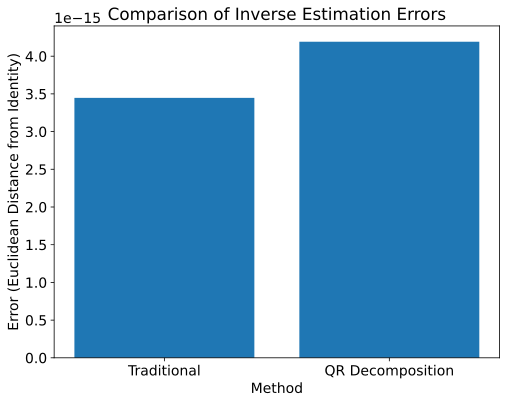

In [ ]:
# a function to compute the inverse
def oldSchoolInv(A):

  # matrix size
  m = A.shape[0]


  # abort if non-square
  if not np.diff(A.shape)[0]==0:
    raise Exception('Matrix must be square.')

  # abort if singular
  if np.linalg.matrix_rank(A)<m:
    raise Exception('Matrix must be full-rank.')


  # initialize
  M = np.zeros((m,m)) # minors matrix
  G = np.zeros((m,m)) # grid matrix

  # compute minors matrix
  for i in range(m):
    for j in range(m):

      # select rows and cols
      rows = [True]*m
      rows[i] = False

      cols = [True]*m
      cols[j] = False

      # compute the minors
      M[i,j]=np.linalg.det(A[rows,:][:,cols])

      # compute Grid
      G[i,j] = (-1)**(i+j)


  # compute cofactors matrix
  C = M * G

  # compute adjugate matrix
  return C.T / np.linalg.det(A)

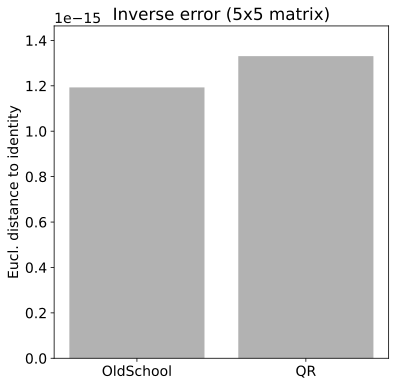

In [ ]:
# create a matrix
n = 5
A = np.random.randn(n,n)

# old-school inverse method
Ainv_old = oldSchoolInv(A)
AAi_old  = Ainv_old@A

# via QR
Q,R = np.linalg.qr(A)
Ainv_qr = oldSchoolInv(R)@Q.T
AAi_qr  = Ainv_qr@A



# differences
trueI = np.eye(n)
sse = [0,0] # sse = sum of squared errors
sse[0] = np.sqrt(np.sum((AAi_old-trueI)**2))
sse[1] = np.sqrt(np.sum((AAi_qr-trueI )**2))


# and plot
plt.figure(figsize=(6,6))

plt.bar(range(2),sse,color=[.7,.7,.7])
plt.xticks(range(2),labels=['OldSchool','QR'])
plt.ylim([0,np.max(sse)*1.1])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix)',ha='center')
plt.savefig('Figure_08_03.png',dpi=300)
plt.show()

코드를 여러 번 실행하고 막대 그래프를 살펴봅니다. 때로는 전통적인 방식이 더 나은
경우도 있고 QR 분해가 더 나은 경우도 있습니다(숫자가 작을수록 좋습니다. 이론적으로는 막대의 높이가 0이어야 합니다). 30×30 행렬을 사용하여 다시 시도해 보세요. 결
과가 더 일관성이 있나요? 실제로 실행마다 많은 차이가 있습니다. 따라서 여러 번 반복
해서 비교하는 실험을 진행해야 합니다. 이것이 다음 연습 문제입니다.

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # 전통적인 역행렬 계산 함수
# def oldschoolInv(A):
#     return np.linalg.inv(A)

# # QR 분해를 이용한 역행렬 계산 함수
# def qrInv(A):
#     Q, R = np.linalg.qr(A)
#     Rinv = np.linalg.inv(R)
#     return Rinv @ Q.T

# # 5x5 난수 행렬 생성
# A = np.random.rand(5, 5)

# # 전통적인 방법으로 역행렬 계산
# Ainv_old = oldschoolInv(A)

# # QR 분해 방법으로 역행렬 계산
# Ainv_qr = qrInv(A)

# # 역추정 오차 계산
# error_old = np.linalg.norm(A @ Ainv_old - np.eye(5))
# error_qr = np.linalg.norm(A @ Ainv_qr - np.eye(5))

# # 결과 시각화
# methods = ['Traditional', 'QR Decomposition']
# errors = [error_old, error_qr]

# plt.figure(figsize=(8, 6))
# plt.bar(methods, errors)
# plt.xlabel('Method')
# plt.ylabel('Error (Euclidean Distance from Identity)')
# plt.title('Comparison of Inverse Estimation Errors')
# plt.show()

# Exercise 5
이전 연습 문제의 코드를 매번 다른 난수 행렬을 사용하여 실험을 100회 이상 반복하는
for문에 넣습니다. 각 반복마다 오차(유클리드 거리)를 저장하고 모든 실험 결과의 평균
(강조색 막대)과 모든 개별 오차(검은색 점)를 보여 주는 [그림 8-4] 그래프를 그립니다.
5×5 행렬과 30 x 30 행렬에 대해 실험을 실행합니다.
전통적인 방법 대신 np.linalg.inv를 사용하여 R을 반전시켜서 효과가 있는지 확인합 니다.

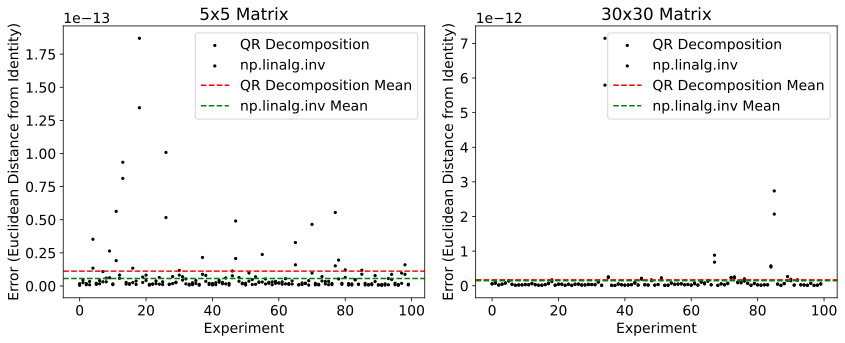

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# QR 분해를 이용한 역행렬 계산 함수
def qrInv(A):
    Q, R = np.linalg.qr(A)
    Rinv = np.linalg.inv(R)
    return Rinv @ Q.T

# 실험 반복 횟수
num_experiments = 100

# 5x5 행렬 실험
errors_qr_5 = []
errors_inv_5 = []

for _ in range(num_experiments):
    A = np.random.rand(5, 5)
    Ainv_qr = qrInv(A)
    Ainv_inv = np.linalg.inv(A)
    error_qr = np.linalg.norm(A @ Ainv_qr - np.eye(5))
    error_inv = np.linalg.norm(A @ Ainv_inv - np.eye(5))
    errors_qr_5.append(error_qr)
    errors_inv_5.append(error_inv)

# 30x30 행렬 실험
errors_qr_30 = []
errors_inv_30 = []

for _ in range(num_experiments):
    A = np.random.rand(30, 30)
    Ainv_qr = qrInv(A)
    Ainv_inv = np.linalg.inv(A)
    error_qr = np.linalg.norm(A @ Ainv_qr - np.eye(30))
    error_inv = np.linalg.norm(A @ Ainv_inv - np.eye(30))
    errors_qr_30.append(error_qr)
    errors_inv_30.append(error_inv)

# 결과 시각화
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 5x5 행렬 결과
axs[0].scatter(range(num_experiments), errors_qr_5, color='black', s=5, label='QR Decomposition')
axs[0].scatter(range(num_experiments), errors_inv_5, color='black', s=5, label='np.linalg.inv')
axs[0].axhline(np.mean(errors_qr_5), color='r', linestyle='--', label='QR Decomposition Mean')
axs[0].axhline(np.mean(errors_inv_5), color='g', linestyle='--', label='np.linalg.inv Mean')
axs[0].set_title('5x5 Matrix')
axs[0].set_xlabel('Experiment')
axs[0].set_ylabel('Error (Euclidean Distance from Identity)')
axs[0].legend()

# 30x30 행렬 결과
axs[1].scatter(range(num_experiments), errors_qr_30, color='black', s=5, label='QR Decomposition')
axs[1].scatter(range(num_experiments), errors_inv_30, color='black', s=5, label='np.linalg.inv')
axs[1].axhline(np.mean(errors_qr_30), color='r', linestyle='--', label='QR Decomposition Mean')
axs[1].axhline(np.mean(errors_inv_30), color='g', linestyle='--', label='np.linalg.inv Mean')
axs[1].set_title('30x30 Matrix')
axs[1].set_xlabel('Experiment')
axs[1].set_ylabel('Error (Euclidean Distance from Identity)')
axs[1].legend()

plt.tight_layout()
plt.show()


이 코드에서는 5x5 행렬과 30x30 행렬에 대해 각각 100회의 실험을 반복합니다. 각 실험에서 난수 행렬을 생성하고, QR 분해 방법과 `np.linalg.inv` 함수를 사용하여 역행렬을 계산합니다. 그리고 역추정 오차를 계산하여 리스트에 저장합니다.

마지막으로 결과를 시각화하기 위해 5x5 행렬과 30x30 행렬의 결과를 각각 서브플롯으로 나타냅니다. 각 서브플롯에서 개별 오차는 검은색 점으로 표시되고, 평균 오차는 빨간색(QR 분해)과 녹색(`np.linalg.inv`) 점선으로 표시됩니다.

이 코드를 실행하면 5x5 행렬과 30x30 행렬에 대한 실험 결과를 비교할 수 있는 그래프가 출력됩니다. 일반적으로 QR 분해 방법이 더 작은 오차를 보이지만, 행렬의 크기와 조건에 따라 결과가 달라질 수 있습니다.

In [ ]:
# # run experiment

# # matrix size
# n = 5

# numExprs = 100

# sse = np.zeros((numExprs,2))

# for expi in range(numExprs):

#   # create matrix
#   A = np.random.randn(n,n)

#   # old-school inverse method
#   Ainv_old = oldSchoolInv(A)
#   AAi_old  = Ainv_old@A

#   # via QR
#   Q,R = np.linalg.qr(A)
#   Ainv_qr = oldSchoolInv(R)@Q.T # using the old-school method
#   # Ainv_qr = np.linalg.inv(R)@Q.T # using numpy's inv
#   AAi_qr  = Ainv_qr@A

#   # differences
#   trueI = np.eye(n)
#   sse[expi,0] = np.sqrt(np.sum((AAi_old-trueI)**2))
#   sse[expi,1] = np.sqrt(np.sum((AAi_qr-trueI )**2))


# # and plot
# plt.figure(figsize=(6,6))

# plt.plot(np.zeros(numExprs),sse[:,0],'ko')
# plt.plot(np.ones(numExprs),sse[:,1],'ko')
# plt.bar(range(2),np.mean(sse,axis=0),color=[.7,.7,.7])

# plt.xticks(range(2),labels=['OldSchool','QR'])
# plt.ylim([0,np.max(sse)*1.1])
# plt.ylabel('Eucl. distance to identity')
# plt.title(f'Inverse error ({n}x{n} matrix)',ha='center')
# plt.savefig('Figure_08_04a.png',dpi=300)
# plt.show()

In [ ]:
# # and plot
# plt.figure(figsize=(6,6))

# plt.plot(np.zeros(numExprs),sse[:,0],'ko')
# plt.plot(np.ones(numExprs),sse[:,1],'ko')
# plt.bar(range(2),np.mean(sse,axis=0),color=[.7,.7,.7])

# plt.xticks(range(2),labels=['OldSchool','QR'])
# plt.ylim([0,np.max(sse)*1.1])
# plt.ylabel('Eucl. distance to identity')
# plt.title(f'Inverse error ({n}x{n} matrix)',ha='center')
# plt.savefig('Figure_08_04b.png',dpi=300)
# plt.show()

# Exercise 6
정방 직교 행렬의 흥미로운 특성은 모든 특잇값(및 그 고윳값이 1이라는 것입니다. 즉,
유도된 2-노름이 1이고(유도된 노름은 가장 큰 특잇값), 프로베니우스 노름이 M이라는
뜻입니다. 프로베니우스 노름이 M인 이유는 제곱된 특잇값을 더한 값의 제곱근이기 때
문입니다. 이 문제에서는 이러한 특성을 확인합니다.
난수 행렬의 QR 분해를 통해 MXN 직교 행렬을 만듭니다. np.linalg.norm을 사용하여
유도된 2-노름을 계산하고 5장에서 배운 방정식을 사용하여 M의 제곱근으로 나누어
프로베니우스 노름을 계산합니다. 두 값이 모두 1인지 확인합니다(합리적인 반올림 허용
오차 범위 내에서). 다양한 M 값을 사용하여 확인합니다.
다음으로 행렬-벡터 곱셈을 사용하여 유도된 노름의 의미를 알아봅니다. 무작위로 M
개의 원소를 가진 열벡터 V를 생성한 다음 v와 QV 의 노름을 계산합니다. 이 노름은 서
로 같아야 합니다(기대하지는 않겠지만 1이 되어야 합니다).
마지막으로 종이를 준비해서 경험적 사실을 증명해 보세요.


In [ ]:
# create a random orthogonal matrix
n = 13
Q,R = np.linalg.qr(np.random.randn(n,n))

# print out the norms
print( np.linalg.norm(Q,2),               # induced 2-norm
       np.sqrt( np.sum(Q**2) )/np.sqrt(n) # manually computed Frobenius norm
)

In [ ]:
# effects of matrix multiplication on vector norm

# a random vector
v = np.random.randn(n,1)

# norms
norm_v  = np.linalg.norm(v)
norm_Qv = np.linalg.norm(Q@v)

# print them
print(norm_v)
print(norm_Qv)

# Exercise 7
이 연습 문제에서는 QR 분해를 사용하여 최소제곱법을 구현하는 방법을 이해하는 데 도 움이 되는 R 행렬의 한 가지 특징을 중점적으로 살펴봅니다(11장). A가 높고 최대열계
수일 때, R의 처음 N행은 상삼각이고, 반면에 N+1부터 M까지의 행은 0입니다. 파
이썬에서 10 x 4 난수 행렬을 사용하여 이를 확인합니다. 경제형(축소) 분해가 아닌 완
전형(전체) QR 분해를 사용해야 합니다.
물론 R은 정방이 아니므로 비가역입니다. 그러나 (1) 처음 N개의 행을 구성하는 행렬
은 정방이고 최대계수이므로(A가 최대열계수인 경우) 완전 역행렬을 가지며, (2) 높은
행렬은 의사역행렬을 가집니다. 두 역행렬을 모두 계산하고, R의 처음 N행의 완전 역
행렬이 R의 의사역행렬의 처음 N 열과 같다는 것을 확인합니다.


In [ ]:
# the matrix
A = np.random.randn(10,4)

# get R
_,R = np.linalg.qr(A,'complete')

# examine R
np.round(R,3)

In [ ]:
# invertible submatrix
Rsub = R[:4,:]

# inverses
Rsub_inv = np.linalg.inv(Rsub)
Rleftinv = np.linalg.pinv(R)

# print out both
print('Full inverse of R submatrix:')
print(np.round(Rsub_inv,3)), print(f'\n\n')

print('Left inverse of R:')
print(np.round(Rleftinv,3))

In [ ]:
import requests
from bs4 import BeautifulSoup

# 크롤링할 URL
url = "https://entertain.naver.com/home"

# 요청 보내기
response = requests.get(url)

# HTML 파싱
soup = BeautifulSoup(response.content, "html.parser")

# 연예 기사 링크 추출
article_links = []
articles = soup.select("div.newsList > ul > li > a")
for article in articles:
    link = article.get("href")
    article_links.append(link)
